<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/VISUALIZACION_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

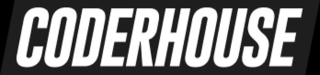

# **CURSO DE DATA SCIENCE**
# Comisión 41870

# **DESAFIO N° 2 - VISUALIZACIÓN**

*AUTOR: Eduardo Ettlin

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**1er. DATASET:**
Link de acceso al sitio de Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
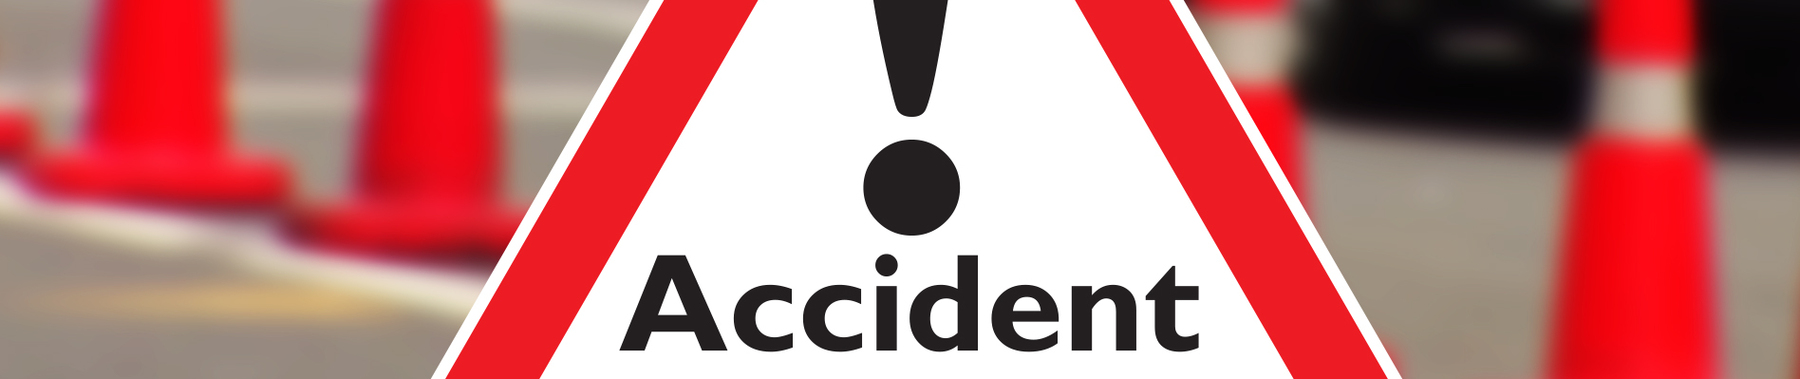


Contiene la información sobre accidentes en las principales ciudades de EE. UU. Posee una gran cantidad de variables que podrían relacionar causas y efectos de accidentes.



**# Se importa la librería Pandas y se crea el DataFrame**

In [3]:
import pandas as pd

df1 =  pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv')


**# Se visualizan los primeros datos del Dataframe con sus nombre de columna**

In [4]:
df1.head(7)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df1.shape

(2845342, 47)

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

# **Preguntas Básicas**

¿Qué ciudad en EE. UU. ha informado más no. de Casos de Accidentes en los últimos 5 años (2016-2020) ?

¿Cuáles son las 10 calles más propensas a los accidentes en EE. UU.?

Por día, en promedio, ¿cuántos accidentes de tráfico se produjeron en EE. UU.?

¿En qué horas del día ocurrieron la mayoría de los accidentes en EE. UU.?

¿Cómo son las condiciones climáticas básicas en la mayoría de los casos de accidentes en EE.UU.?

¿Cuáles son los 10 estados con más no. de los casos de accidentes de tráfico en EE.UU.?

# **MATPLOTLIB**

Se importan los paquetes necesarios

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt


## FUNCIONES COMUNES

**Etiquetas para Gráficos**

In [46]:
def autolabel(datos,rotacion):
    for dato in datos:
      height = dato.get_height()
      ax1.annotate('{}'.format(height),
                   xy=(dato.get_x()+dato.get_width()/2,height),
                   xytext=(0,6),
                   textcoords="offset points",
                   ha='center',va='bottom',rotation=rotacion
                   ) 

**Etiquetas Gráfico de Barras en conjuntos de datos**


In [9]:
def values(ax, rotacion):
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:
      ax.text(i.get_x() + 0.05, i.get_height() + 1 ,  str(round((i.get_height()/total)*100, 2))+'% '+str(i.get_height()), fontsize = 10, color = 'black', rotation=rotacion)
     

## **1er Gráfico Matplotlib**
*Pregunta*:

¿Cuál es la cantidad de accidentes y la gravedad de los mismos?

Se puede advertir que la mayoría de los accidentes son de severidad 2, esta severidad impica daños materiales y personales menores

In [14]:
#Defino los valores para los ejes (X,Y)
severidad_cantidad = df1.groupby('Severity')['Severity'].agg(len)
severidad_tipos = list(df1['Severity'].value_counts().index)

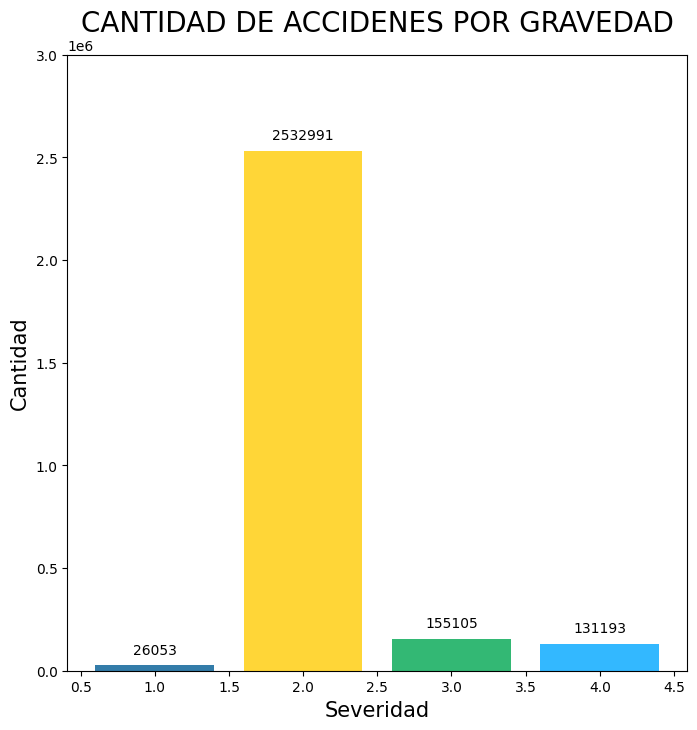

In [47]:

fig, ax1 = plt.subplots(figsize=(8,8))
graf = ax1.bar(sorted(severidad_tipos), severidad_cantidad, color= ['#337ca9','#ffd637','#33b874','#33b8ff'])
ax1.set_ylim([0,3000000])
ax1.set_title('CANTIDAD DE ACCIDENES POR GRAVEDAD', fontsize= '20')
ax1.set_ylabel('Cantidad', fontsize= '15')
ax1.set_xlabel('Severidad',fontsize= '15')
autolabel(graf, 0)

plt.show()

In [35]:
# Creación colores aleatorios
import random

def color_aleatorio():
  r, g, b = random.randint(0,255), random.randint(0,255), random.randint(0,255)
  return "#{:02x}{:02x}{:02x}".format(r,g,b)

color = [color_aleatorio() for _ in range(100)]

## **2do Gráfico Matplotlib**

*Pregunta*:

¿Cuales son las ciudades con más accidentesd?

Podemos inferir que en la ciudad (MIAMI)tiene la mayor cantidad de accidentes


In [28]:
from numpy.lib.shape_base import tile

# creo el dataframe de ciudades y el recuento de sus accidentes 
ciudades_df = pd.DataFrame(df1['City'].value_counts()).reset_index().rename(columns={'index':'Ciudad', 'City':'Casos'})


# Genero el TOP 10
top_10_ciudades = pd.DataFrame(ciudades_df.head(10))

top_10_ciudades

,Ciudad,Casos
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
5,Charlotte,33152
6,Sacramento,32559
7,San Diego,26627
8,Raleigh,22840
9,Minneapolis,22768


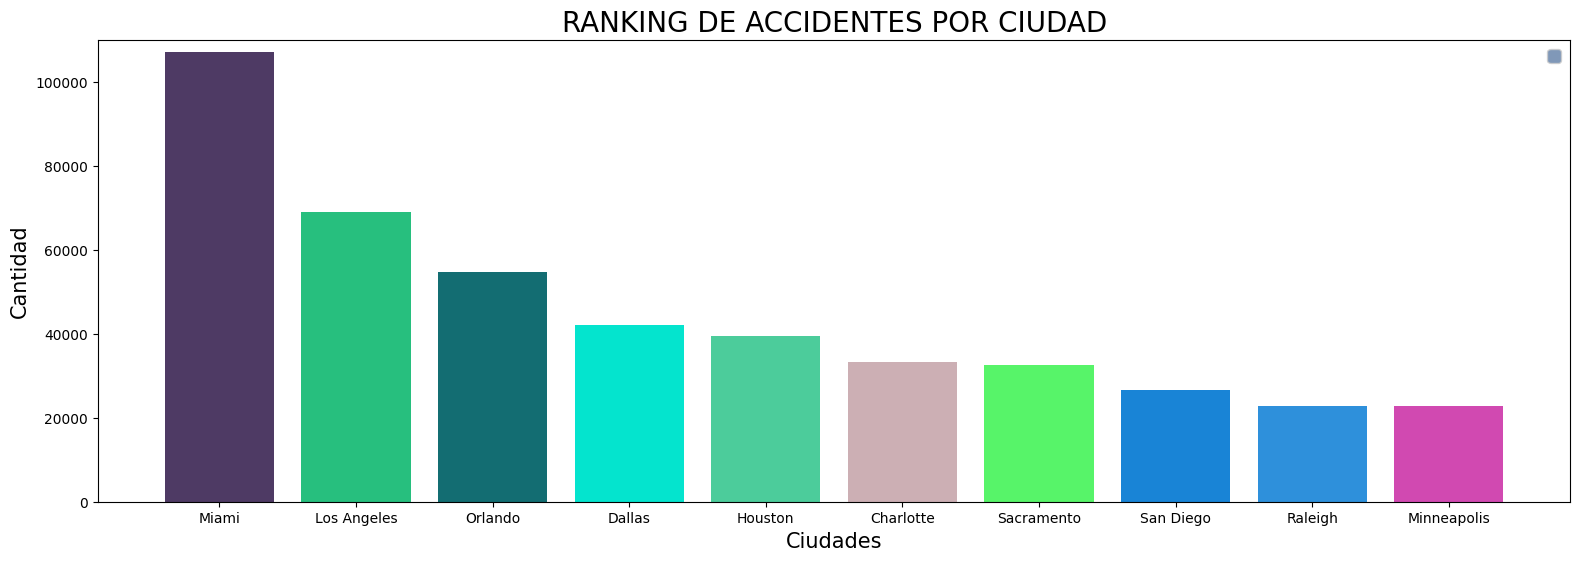

In [69]:
#Defino el gráfico agrupado por Ciudad y Tipo de Severidad

fig, ax2 = plt.subplots(figsize=(19,6))

ax2.bar(top_10_ciudades['Ciudad'], top_10_ciudades['Casos'], color=color)

ax2.set_title('RANKING DE ACCIDENTES POR CIUDAD', fontsize='20')
ax2.set_ylim([0,110000])
ax2.set_ylabel('Cantidad', fontsize='15')
ax2.set_xlabel('Ciudades', fontsize='15')
ax2.legend(loc='best', facecolor="#607EA6", fontsize=13)

plt.show()

## **3er Gráfico Matplotlib**
*Pregunta:*

¿Cuál es la cantidad de Accidentes ocurridos uso por Estado? Se limita la visualización del pie-chart a 20 estados 

In [106]:
# creo el dataframe de ESTADOS y el recuento de sus accidentes 

estados_df = pd.DataFrame(df1['State'].value_counts()).reset_index().rename(columns={'index':'Estado', 'State':'Casos'})
estados_df.head(10)

,Estado,Casos
0,CA,795868
1,FL,401388
2,TX,149037
3,OR,126341
4,VA,113535
5,NY,108049
6,PA,99975
7,MN,97185
8,NC,91362
9,SC,89216


In [100]:
# Utilizo Severidad por Estado para agrupar
estados_severidad_df = df1.groupby(['State','Severity'])['Number'].count()
estados_severidad_df.head(10)

State  Severity
AL     1              25
       2            5169
       3             216
       4             415
AR     1               4
       2            2646
       3              87
       4             701
AZ     1            3875
       2           18046
Name: Number, dtype: int64

In [103]:
estados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   49 non-null     object
 1   State   49 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 912.0+ bytes


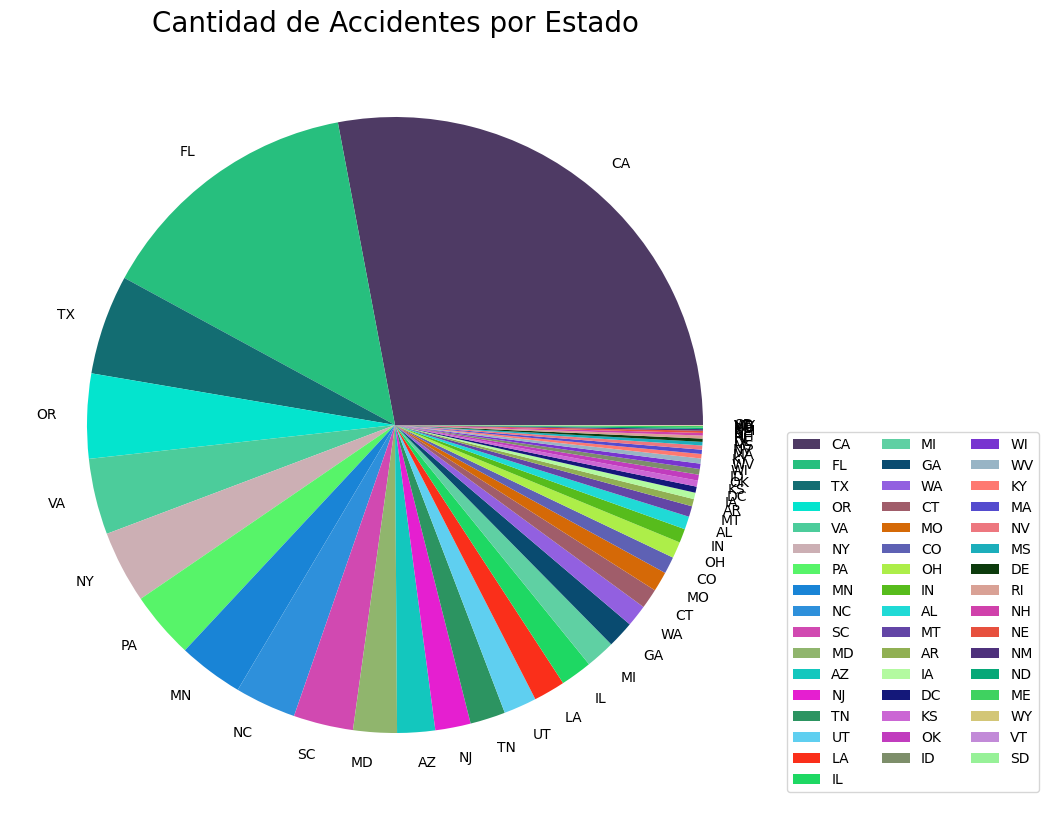

In [117]:
from numpy import size
#Defino valores para (x,y)
plt.figure(figsize=(10,10))
#bed_type_cantidad = df1('State').count()
# Ordenar me Mayor a Menor y Segmentar Top 20  (Excede la utilidad el grafico de torta)


bed_type_tipos = list(df1['State'].value_counts().index)
desfase=(0.07,0.07,0.07,0.07,0.2,0.05)
plt.pie(estados_df['Casos'], labels = estados_df['Estado'], colors = color )
plt.title('Cantidad de Accidentes por Estado', fontsize = '20')
plt.legend(loc='lower right', facecolor='#ffcc99',fontsize=11)

plt.legend(ncol=3,  loc='best',bbox_to_anchor=(1, 0.5))
plt.show()

# **SEABORN**

### 1er Gráfico Seaborn 

*Pregunta:*

¿Cuál es la cantidad y tipo de habitaciones disponibles?

Se puede advertir que existen mas de 10.000 casa disponibles sobre la cantidad de habitaciones privadas, y ademas las habitaciones compartidas son las que menos se han construido o comprado ya que no es la opcion mas elegida por los clientes.

In [96]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib
import seaborn as sns

13. En EE. UU., California es el estado con el número más alto. de accidentes de tránsito en los últimos 5 años.

14. Alrededor del 30 % del total de registros de accidentes de los últimos 5 años en EE. UU. es solo de California.

15. En los últimos 5 años, un promedio de 246 accidentes (diarios) ocurridos en California implica aproximadamente 10 accidentes por hora.

16. Florida es el segundo estado más alto (10% de casos) para el no. Accidentes de tráfico en EE.

In [94]:
# crear Diccionario con el nombre de los estados
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# crear un dataframe de los Estados y cantidad de accidentes
state_df = pd.DataFrame(df1['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})


# Function para devolver el nombre del Estado desde el Código 
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)


top_ten_states_name = list(state_df['State'].head(10))

<ipython-input-98-03d7d74ccea3>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('winter', 10)


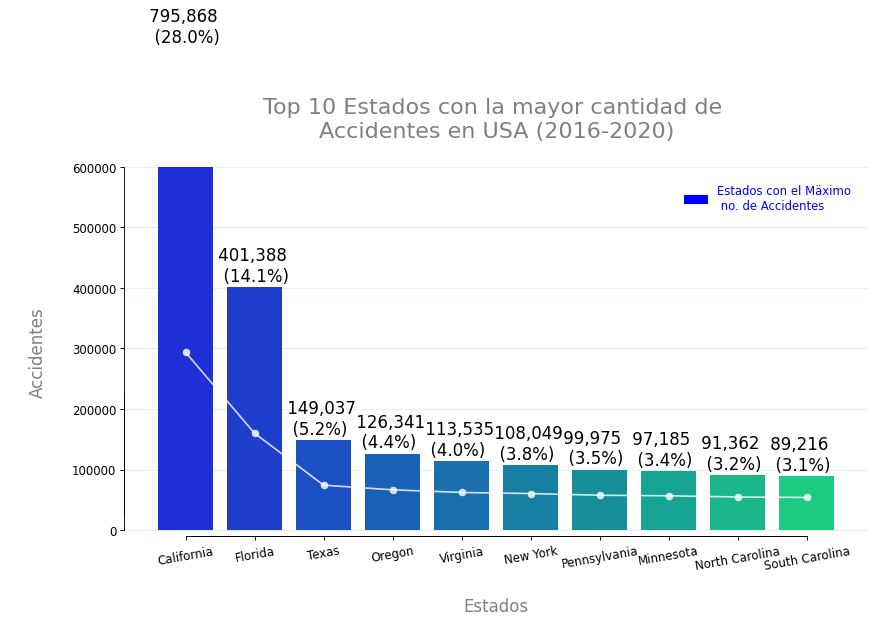

In [98]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('winter', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='winter')
ax1 = ax.twinx()
sns.lineplot(data = state_df[:10], marker='o', x='State', y='Cases', color = 'white', alpha = .8)


total = df1.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')

ax.set(ylim =(-10000, 600000))
ax1.set(ylim =(-100000, 1700000))

plt.title('\nTop 10 Estados con la mayor cantidad de \nAccidentes en USA (2016-2020)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nEstados\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccidentes\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='Estados con el Mäximo\n no. de Accidentes')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');

https://www.kaggle.com/code/satyabrataroy/60-insights-extraction-us-accident-analysis

In [ ]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df1['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [ ]:
top_10_cities = pd.DataFrame(city_df.head(10))

<ipython-input-27-2fca7ab57d29>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', 10)


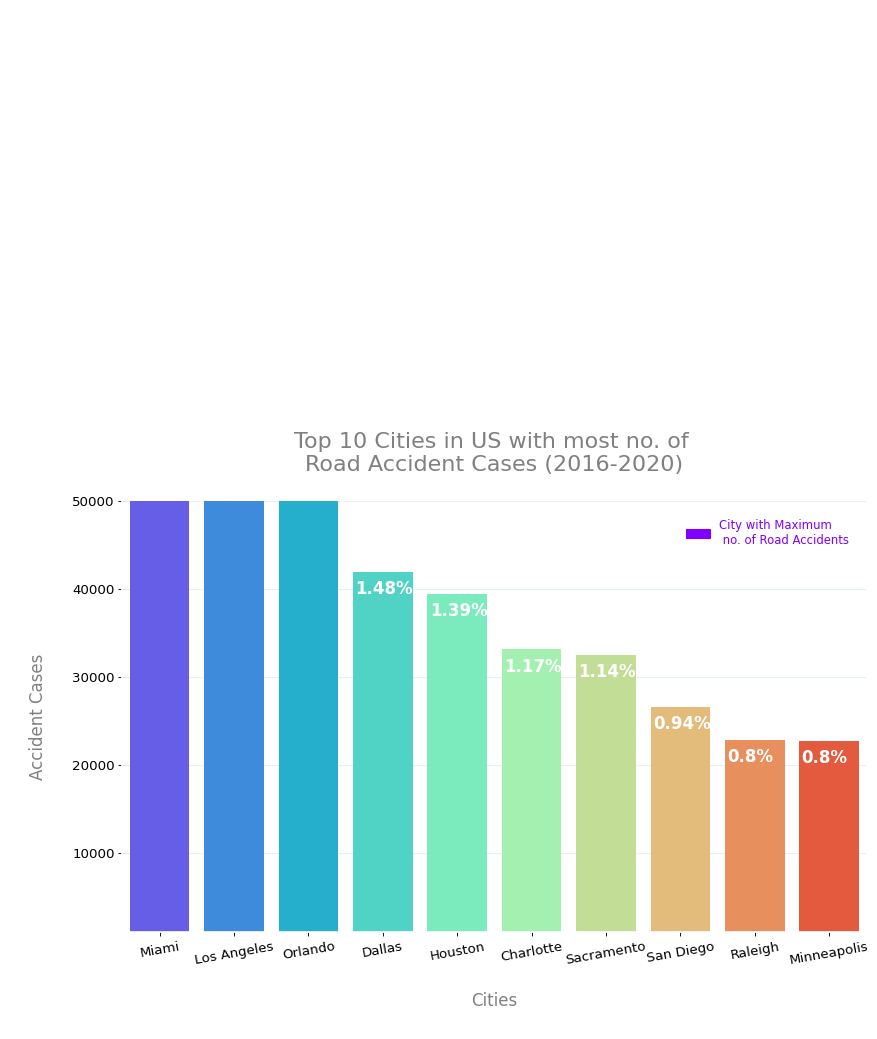

In [ ]:
fig, ax = plt.subplots(figsize = (12,7), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette='rainbow')

total = sum(city_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, weight='bold',
                color='white')

plt.title('\nTop 10 Cities in US with most no. of \nRoad Accident Cases (2016-2020)\n', size=20, color='grey')

plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

plt.ylim(1000, 50000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpatches.Patch(color=clrs[0], label='City with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()

In [ ]:
df1

NameError: ignored

In [ ]:
#Importo biblioteca SEABORN
import seaborn as sns
#Defino los valores para los ejes (X,Y)
Severidad_cantidad = df1.groupby('Severity')['Severity'].agg(len)
Severidad_tipos = list(df1['Severity'].value_counts().index)

NameError: ignored